In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import time
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Question 1

In [ ]:
# read training and test data and combine them into one dataframe
df_train = pd.read_csv('/content/drive/MyDrive/UMD/DATA 604/fashion_mnist_data/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/UMD/DATA 604/fashion_mnist_data/fashion-mnist_test.csv')
df = pd.concat([df_train,df_test])
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 785)

In [ ]:
df['label'].value_counts()

2    7000
9    7000
6    7000
0    7000
3    7000
4    7000
5    7000
8    7000
7    7000
1    7000
Name: label, dtype: int64

In [ ]:
# sort the dataframe with respect to the class labels
df = df.sort_values(by='label')
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,1,0,...,144,151,140,0,0,3,0,0,0,0
1,0,0,0,0,0,5,0,0,28,130,...,102,141,198,68,0,0,5,0,0,0
2,0,0,0,0,0,0,0,0,0,32,...,0,41,186,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,15,15,31,29,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,30,...,0,0,0,0,0,0,0,0,0,0


## Question 2

In [ ]:
%%time
# for loop for evaluating computer's capability
s = 0
for i in range(1000):
  s += i
s

CPU times: user 196 µs, sys: 0 ns, total: 196 µs
Wall time: 201 µs


499500

In [ ]:
print('The time required for a single arithmetic operation is ',196/(1000*2),' µs')

The time required for a single arithmetic operation is  0.098  µs


In [ ]:
print('The time required for performing KNN on entire dataset is approximately', 0.098*20*70000*784/(1000000),' seconds')

The time required for performing KNN on entire dataset is approximately 107.5648  seconds


## Question 3

In [ ]:
# Method 1 to split the dataframe into training and test datasets
def split_train_test(df,N):
  df_train = df.iloc[:N]
  df_test = df.iloc[N:7000]
  for i in range(1,10):
    df2 = df.iloc[i*7000:i*7000+N]
    df3 = df.iloc[i*7000+N:(i+1)*7000]
    df_train = pd.concat([df_train,df2])
    df_test = pd.concat([df_test,df3])
    y_train  = df_train['label']
    X_train =  df_train.drop(['label'],axis = 1)
    y_test  = df_test['label']
    X_test =  df_test.drop(['label'],axis = 1)
  return X_train, X_test, y_train, y_test


In [ ]:
# Train a KNN model
def train_knn(X_train, y_train):
  start_train = time.time()
  knn_model = KNeighborsClassifier(n_neighbors=20,algorithm='brute', metric='euclidean')
  knn_model.fit(X_train, y_train)
  end_train = time.time()
  train_time = end_train - start_train
  print("Training time is %s seconds" % train_time)
  return knn_model

In [ ]:
# Test a KNN model
def test_knn(knn_model,X_test, y_test):
  start_test = time.time()
  y_hat = knn_model.predict(X_test)
  end_test = time.time()
  test_time = end_test - start_test
  print("Testing time is %s seconds" % test_time)
  return y_hat

In [ ]:
# Evaluate time required for worst case
X_train, X_test, y_train, y_test = split_train_test(df,6700)
knn_model = train_knn(X_train, y_train)
y_hat = test_knn(knn_model,X_test, y_test)

Training time is 0.5205934047698975 seconds
Testing time is 13.984227895736694 seconds


In [ ]:
print('Approximate time required for the experiment is ', 107.565*17, ' seconds')

Approximate time required for the experiment is  1828.605  seconds


In [ ]:
# Experiment to determine optimal N
start_knn = time.time()
N = [int(i) for i in range(3500,6900,200)]
f1score_train = []
accuracy_train = []
f1score_test = []
accuracy_test = []
for i in N:
  X_train, X_test, y_train, y_test = split_train_test(df,i)
  knn_model = train_knn(X_train, y_train)
  y_hat_train = test_knn(knn_model,X_train, y_train)
  y_hat = test_knn(knn_model,X_test, y_test)
  f1score_train.append(f1_score(y_train,y_hat_train, average='micro'))
  accuracy_train.append(accuracy_score(y_train,y_hat_train))
  f1score_test.append(f1_score(y_test,y_hat, average='micro'))
  accuracy_test.append(accuracy_score(y_test,y_hat))
  # micro- Calculate metrics globally by counting the total true positives, false negatives and false positives.
end_knn = time.time()
knn_time = end_knn - start_knn

Training time is 0.10466361045837402 seconds
Testing time is 88.63789582252502 seconds
Testing time is 85.78179502487183 seconds
Training time is 0.10984635353088379 seconds
Testing time is 95.29033946990967 seconds
Testing time is 81.11227869987488 seconds
Training time is 0.13638997077941895 seconds
Testing time is 105.59655165672302 seconds
Testing time is 81.25925588607788 seconds
Training time is 0.1436011791229248 seconds
Testing time is 121.05122709274292 seconds
Testing time is 84.2584457397461 seconds
Training time is 0.1289079189300537 seconds
Testing time is 129.65383195877075 seconds
Testing time is 84.87773442268372 seconds
Training time is 0.13286375999450684 seconds
Testing time is 152.38646006584167 seconds
Testing time is 82.87688064575195 seconds
Training time is 0.1395120620727539 seconds
Testing time is 159.1853904724121 seconds
Testing time is 77.44628620147705 seconds
Training time is 0.1428234577178955 seconds
Testing time is 168.97048997879028 seconds
Testing ti

In [ ]:
print("Time required is %s seconds" % knn_time)
print('N with best f1-score is: ',3500 + 200*f1score_test.index(max(f1score_test)))
print('N with best global success rate is: ',3500 + 200*accuracy_test.index(max(accuracy_test)))

Time required is 3774.7605776786804 seconds
N with best f1-score is:  6100
N with best global success rate is:  6100


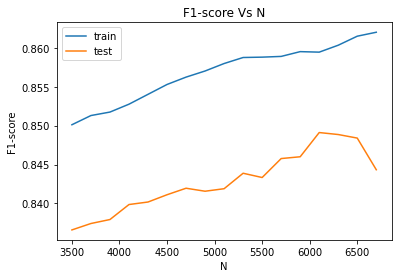

In [ ]:
# plot f1-score Vs N
plt.plot(N,f1score_train,label='train')
plt.plot(N,f1score_test,label='test')
plt.legend()
plt.title("F1-score Vs N")
plt.xlabel("N")
plt.ylabel("F1-score")
plt.show()

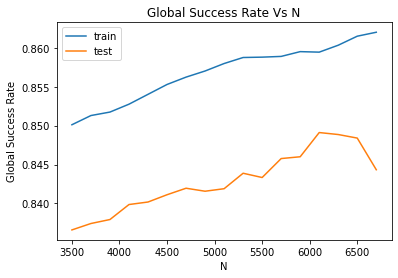

In [ ]:
# plot global success rate Vs N
plt.plot(N,accuracy_train,label='train')
plt.plot(N,accuracy_test,label='test')
plt.legend()
plt.title("Global Success Rate Vs N")
plt.xlabel("N")
plt.ylabel("Global Success Rate")
plt.show()

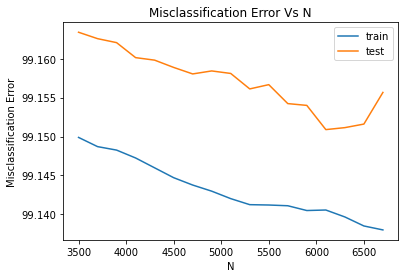

In [ ]:
# plot misclassification error
plt.plot(N,100-np.array(accuracy_train),label='train')
plt.plot(N,100-np.array(accuracy_test),label='test')
plt.legend()
plt.title("Misclassification Error Vs N")
plt.xlabel("N")
plt.ylabel("Misclassification Error")
plt.show()

The model for N = 6100 has the highest global success rate and f1-score for the test dataset. Hence, N = 6100 is an approapriate choice for the number of training samples in each class.

In [ ]:
# train KNN model with optimal N
X_train, X_test, y_train, y_test = split_train_test(df,6100)
knn_model = train_knn(X_train, y_train)
y_hat = test_knn(knn_model,X_test, y_test)

Training time is 0.20235824584960938 seconds
Testing time is 25.98878836631775 seconds


In [ ]:
# F1-score and accuracy for 1st model
f1_score_method1 = f1_score(y_test,y_hat, average='micro')
accuracy_method1 = accuracy_score(y_test,y_hat)
print('F1-score is ',f1_score_method1)
print('Accuracy is ',accuracy_method1)

F1-score is  0.8491111111111111
Accuracy is  0.8491111111111111


# Question 4

Choose N random samples for training in each class and remaining ones for testing.

In [ ]:
# Alternative mothod for splitting the dataframe into training and testing dataset
def split_train_test_2(df,N):
  X = df.drop(['label'],axis = 1)
  y = df['label']
  X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=1-N*10/len(X), random_state=1, stratify=y)
  # stratify option ensures equal distribution amongst classes
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_train_test_2(df,6100)

In [ ]:
X_test.shape

(9000, 784)

In [ ]:
# train and test KNN model for alternative method
knn_model_2 = train_knn(X_train, y_train)
y_hat_2 = test_knn(knn_model,X_test, y_test)

Training time is 0.20974159240722656 seconds
Testing time is 26.522615432739258 seconds


In [ ]:
f1_score_method2 = f1_score(y_test,y_hat_2, average='micro')
accuracy_method2 = accuracy_score(y_test,y_hat_2)
print('F1-score is ',f1_score_method2)
print('Accuracy is ',accuracy_method2)

F1-score is  0.861888888888889
Accuracy is  0.8618888888888889


In [ ]:
# percent change in accuracy with respect to model 1
percent_change = (accuracy_method2-accuracy_method1)*100/accuracy_method1
percent_change

1.5048416644857365

F1- score as well as accuracy are better with random sampling though the percentage change is not very significant.

## Question 5

In [ ]:
# compute euclidean distances of 20 nearest neighbors
distances_2, indices_2 = knn_model_2.kneighbors(X_test)

In [ ]:
index_values = [i for i in range(len(X_test))]
column_values = [str(i) for i in range(20)]
df_euclidean_2 = pd.DataFrame(data = distances_2, index = index_values, columns = column_values)

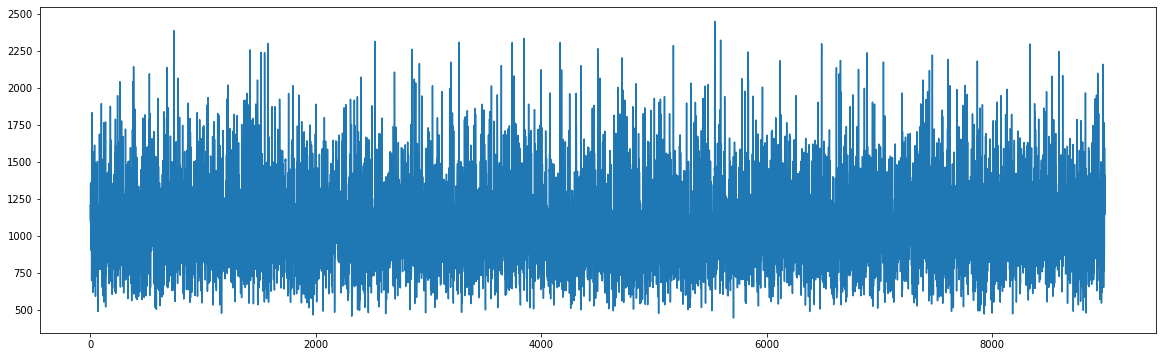

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_euclidean_2.index,df_euclidean_2.mean(axis=1))
# plt.title('Average Euclidean distance from 20 neighrest neighbours')

In [ ]:
# train a knn model using l1 norm/manhattan distance
def train_knn_l1(X_train, y_train):
  start_train = time.time()
  knn_model = KNeighborsClassifier(n_neighbors=20,algorithm='brute',metric='manhattan')
  knn_model.fit(X_train, y_train)
  end_train = time.time()
  train_time = end_train - start_train
  print("Training time is %s seconds" % train_time)
  return knn_model

In [ ]:
# train and test KNN model with l1 norm
X_train, X_test, y_train, y_test = split_train_test_2(df,6100)
knn_model_l1 = train_knn_l1(X_train, y_train)
y_hat_l1 = test_knn(knn_model_l1,X_test, y_test)

Training time is 0.27802324295043945 seconds
Testing time is 566.6280076503754 seconds


In [ ]:
%%time
distances_l1, indices_l1 = knn_model_l1.kneighbors(X_test)

CPU times: user 6min 56s, sys: 2.31 s, total: 6min 58s
Wall time: 7min 7s


In [ ]:
index_values = [i for i in range(len(X_test))]
column_values = [str(i) for i in range(20)]
df_l1 = pd.DataFrame(data = distances_l1, index = index_values, columns = column_values)

In [ ]:
df_l1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,16741.0,16806.0,16917.0,17008.0,17031.0,17038.0,17375.0,17435.0,17526.0,17852.0,17913.0,17960.0,17999.0,18015.0,18091.0,18149.0,18245.0,18369.0,18464.0,18518.0
1,14156.0,14256.0,14545.0,14643.0,14657.0,14804.0,14827.0,14854.0,14884.0,14913.0,15010.0,15065.0,15076.0,15119.0,15144.0,15180.0,15246.0,15252.0,15259.0,15332.0
2,10589.0,11105.0,13526.0,13705.0,13938.0,14142.0,14148.0,15027.0,15087.0,15315.0,15664.0,15858.0,16062.0,16132.0,16323.0,16496.0,16600.0,16778.0,17312.0,17543.0
3,9915.0,15196.0,15770.0,16334.0,16812.0,17532.0,17559.0,18515.0,18698.0,18897.0,18997.0,19187.0,19191.0,19275.0,19284.0,19364.0,19431.0,19528.0,19600.0,19697.0
4,8811.0,9167.0,9220.0,9296.0,9320.0,9772.0,10120.0,10289.0,10452.0,10488.0,10557.0,10616.0,10830.0,10830.0,11185.0,11221.0,11283.0,11305.0,11338.0,11448.0


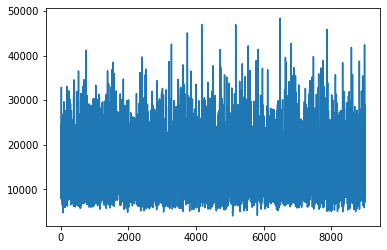

In [ ]:
plt.plot(df_l1.index,df_l1.mean(axis=1))
# plt.title('Average Manhattan distance from 20 neighrest neighbours')

In [ ]:
# f1 score and accuracy of model with l1 metric
f1_score_l1 = f1_score(y_test,y_hat_l1, average='micro')
accuracy_l1 = accuracy_score(y_test,y_hat_l1)
print('F1-score is ',f1_score_l1)
print('Accuracy is ',accuracy_l1)

F1-score is  0.8616666666666667
Accuracy is  0.8616666666666667


## Question 6

In [ ]:
# confusion matrix and individual success rates
cmat_l1 = confusion_matrix(y_hat_l1, y_test) 
cmat_l1 = cmat_l1.astype('float') / cmat_l1.sum(axis=1)[:, np.newaxis]
cmat_l1.diagonal()

array([0.77444337, 0.9908046 , 0.73498965, 0.89821029, 0.77047414,
       0.9887218 , 0.6759388 , 0.89539749, 0.97159091, 0.91945607])

Text(0.5, 1.0, 'Success percentage for each class')

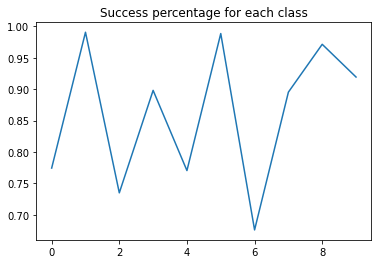

In [ ]:
classes = [i for i in range(10)]
class_wise_global_success_rate = cmat_l1.diagonal()
plt.plot(classes,class_wise_global_success_rate)
plt.title('Success percentage for each class')

In [ ]:
print('Class with highest success rate is ',np.where(class_wise_global_success_rate==max(class_wise_global_success_rate))[0][0])
print('Class with lowest success rate is ',np.where(class_wise_global_success_rate==min(class_wise_global_success_rate))[0][0])

Class with highest success rate is  1
Class with lowest success rate is  6
